# BHT DS 2022 - Excercises CLU (23.06.2022)

## Task

Analyse this dataset: [1]

[1] https://drive.google.com/open?id=1sTO90PQRtbK80XdzMJ2KttRRtt9M7xuq

Now answer these two questions:

A) What is the best k? (usually derived by plotting each graph ;-)

B) Can you print the clustering vector?

(e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...)

## Solution

In [1]:
import numpy as np
import pandas as pd

#interacitve plot
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans

**Step1:** Import dataset and (lecture hint) check to not miss outliers **(std)** or unobvious clusters **(interactive plot from different angles)**

In [2]:
df = pd.read_csv("edlich-kmeans-A0.csv")
X = df.to_numpy()

In [3]:
df

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


In [4]:
df.describe()

,V1,V2,V3
count,100.000000,100.000000,100.000000
mean,-0.731027,3.349859,0.046580
std,5.660510,4.219921,7.334466
min,-9.792300,-5.292139,-10.756151
25%,-5.193274,1.509583,-8.184790
50%,-1.690861,3.570038,3.630742
75%,4.840492,6.526973,5.113720
max,10.640624,10.772783,10.762034


<IPython.core.display.Javascript object>


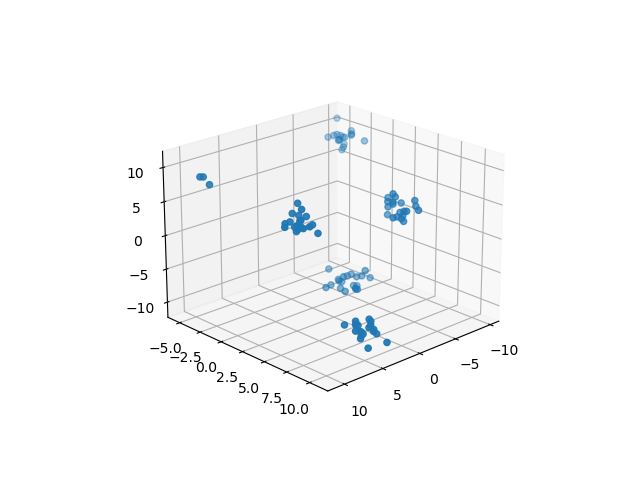

In [5]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2]);

**Finding:** No outliers, in an interactive 3D plot the data is clustered in 6 areas -> **K = 6**

**Step2:** Do the clustering with KMeans

In [6]:
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

<IPython.core.display.Javascript object>


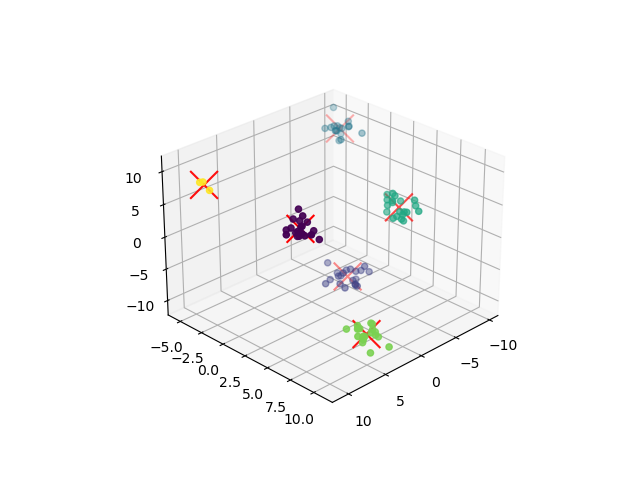

In [7]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='x', c='red', s=400);

**Step3:** Print the **clustering vector** (e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...)

In [8]:
df['Cluster'] = labels.tolist()
df

,V1,V2,V3,Cluster
0,-5.340236,4.747246,3.823326,3
1,-9.587065,-3.434466,9.701839,2
2,-8.385012,-3.902794,8.514620,2
3,5.708226,2.658575,5.404482,0
4,-7.431665,-4.390251,9.003216,2
...,...,...,...,...
95,5.240474,2.983800,5.104915,0
96,-1.675543,3.780111,-8.060940,1
97,2.979751,10.772783,-10.093143,4
98,-5.154519,5.976515,2.794622,3
